In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tweets.csv to tweets.csv


In [ ]:
df = pd.read_csv("tweets.csv")

In [ ]:
df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,text_sentiment
0,Tushar Gupta at DevFest Raipur.,Is this the end of Twitter threads?\n#AI #Chat...,India,•Experiencing Life💬 && Tech🥑 •Learning about💻:...,2021-10-05 05:05:55+00:00,230.0,438.0,1567,False,2022-12-20 13:29:08+00:00,"['AI', 'ChatGPT']",Twitter for Android,Neutral
1,PharmaTechnologyTrends,ChatGPT is a truly mind-blowing tool and playi...,"Frankfurt am Main, Deutschland",Latest News and Trends in Pharmaceutical Industry,2022-11-06 21:03:59+00:00,264.0,4333.0,24,False,2022-12-20 13:28:50+00:00,NaN,EveryoneSocial,Positive
2,Richard Kim,#ChatGPT can be used to generate malicious cod...,NaN,"News, papers, and books on AI, Machine Learnin...",2010-05-06 00:20:48+00:00,4481.0,4982.0,18412,False,2022-12-20 13:28:39+00:00,"['ChatGPT', 'code', 'chatgpt', 'language', 'ai...",shem0304,Neutral
3,GiamMa-based researchers SDR R&D IoT,Use prompt hack to bypass OpenAI's content pol...,NaN,#ArtTechnology #IT #Hardware #Security #OSINT ...,2020-08-29 09:30:40+00:00,1996.0,1190.0,19528,False,2022-12-20 13:28:09+00:00,NaN,Twitter Web App,Neutral
4,"Bobby Davis, Jr.",Why #chatgpt will never replace devs. \n\nhttp...,North Carolina,CEO @CoderFoundry\nAuthor: Breaking the Code h...,2012-06-25 17:36:19+00:00,1182.0,245.0,888,False,2022-12-20 13:27:10+00:00,['chatgpt'],Twitter for Android,Neutral


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df['cleantext']=df['text'].str.lower()

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']


In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['cleantext'] = df['cleantext'].apply(lambda text: cleaning_stopwords(text))
df['cleantext'].head()

0    end twitter threads? #ai #chatgpt @openai http...
1    chatgpt truly mind-blowing tool playing around...
2    #chatgpt used generate malicious code, finds r...
3    use prompt hack bypass openai's content policy...
4    #chatgpt never replace devs. https://t.co/d7rn...
Name: cleantext, dtype: object

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['cleantext']= df['cleantext'].apply(lambda x: cleaning_punctuations(x))
df['cleantext'].tail()

39049    levels🙏🙏🙏so happy chatgpt team com8ng revoluti...
39050    iterating backandforth tools like chatgpt prob...
39051    russel vs chatgpt its also funny takes long ti...
39052    wondering difference jasper chatgpt  gpt3 chat...
39053    chatgpt similar llm pose challenge academic in...
Name: cleantext, dtype: object

In [ ]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['cleantext'] = df['cleantext'].apply(lambda x: cleaning_repeating_char(x))
df['cleantext'].tail()

39049    levels🙏🙏🙏so happy chatgpt team com8ng revoluti...
39050    iterating backandforth tools like chatgpt prob...
39051    russel vs chatgpt its also funny takes long ti...
39052    wondering difference jasper chatgpt  gpt3 chat...
39053    chatgpt similar llm pose challenge academic in...
Name: cleantext, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['cleantext'] = df['cleantext'].apply(lambda x: cleaning_URLs(x))
df['cleantext'].tail()

39049    levels🙏🙏🙏so happy chatgpt team com8ng revoluti...
39050    iterating backandforth tools like chatgpt prob...
39051    russel vs chatgpt its also funny takes long ti...
39052    wondering difference jasper chatgpt  gpt3 chat...
39053    chatgpt similar llm pose challenge academic in...
Name: cleantext, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['cleantext'] = df['cleantext'].apply(lambda x: cleaning_numbers(x))
df['cleantext'].tail()

39049    levels🙏🙏🙏so happy chatgpt team comng revolutio...
39050    iterating backandforth tools like chatgpt prob...
39051    russel vs chatgpt its also funny takes long ti...
39052    wondering difference jasper chatgpt  gpt chatg...
39053    chatgpt similar llm pose challenge academic in...
Name: cleantext, dtype: object

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-z]\w+')
df['cleantext'] = df['cleantext'].apply(tokenizer.tokenize)
df['cleantext'].tail()

39049    [levels, so, happy, chatgpt, team, comng, revo...
39050    [iterating, backandforth, tools, like, chatgpt...
39051    [russel, vs, chatgpt, its, also, funny, takes,...
39052    [wondering, difference, jasper, chatgpt, gpt, ...
39053    [chatgpt, similar, llm, pose, challenge, acade...
Name: cleantext, dtype: object

In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['cleantext']= df['cleantext'].apply(lambda x: stemming_on_text(x))
df['cleantext'].tail()

39049    [levels, so, happy, chatgpt, team, comng, revo...
39050    [iterating, backandforth, tools, like, chatgpt...
39051    [russel, vs, chatgpt, its, also, funny, takes,...
39052    [wondering, difference, jasper, chatgpt, gpt, ...
39053    [chatgpt, similar, llm, pose, challenge, acade...
Name: cleantext, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['cleantext'] = df['cleantext'].apply(lambda x: lemmatizer_on_text(x))
df['cleantext'].tail()

39049    [levels, so, happy, chatgpt, team, comng, revo...
39050    [iterating, backandforth, tools, like, chatgpt...
39051    [russel, vs, chatgpt, its, also, funny, takes,...
39052    [wondering, difference, jasper, chatgpt, gpt, ...
39053    [chatgpt, similar, llm, pose, challenge, acade...
Name: cleantext, dtype: object

In [ ]:
df['X_train_new'] = [','.join(map(str, l)) for l in df['cleantext']]

In [ ]:
X=df.X_train_new
y=df.text_sentiment

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state =None)

In [ ]:
X_train

7627     heres,great,start,week,its,time,get,motivated,...
4770     chatgpt,shows,google,become,eventually,not,gen...
20280    check,latest,chatgpt,top,technology,trends,wat...
31670    sheesh,openai,chatgpt,couldnthave,said,better,...
28895    okay,one,got,me,mental,health,improve,mood,cha...
                               ...                        
13276    asked,chatgpt,help,finish,poem,started,wrote,d...
7931         bot,sure,like,chat,chatgpt,httpstcoubezdfkyce
13579    reasons,might,important,label,content,created,...
8757     asked,chatgpt,generate,titles,fast,amp,furious...
12275    openaichatbot,huge,game,changer,twitter,elonmu...
Name: X_train_new, Length: 31243, dtype: object

In [ ]:
y_test

35836    Positive
4594     Positive
7065     Negative
13685     Neutral
1704      Neutral
           ...   
29726    Negative
36632    Negative
30075     Neutral
6206     Positive
13801    Positive
Name: text_sentiment, Length: 7811, dtype: object

In [ ]:
import seaborn as sns

In [ ]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive','Neutral']
  group_names = ['True Neg','False Pos','False Neu', 'False Neg','True Pos','False Neu','False Neg','False Pos','True Neu']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(3,3)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_train

7627     heres,great,start,week,its,time,get,motivated,...
4770     chatgpt,shows,google,become,eventually,not,gen...
20280    check,latest,chatgpt,top,technology,trends,wat...
31670    sheesh,openai,chatgpt,couldnthave,said,better,...
28895    okay,one,got,me,mental,health,improve,mood,cha...
                               ...                        
13276    asked,chatgpt,help,finish,poem,started,wrote,d...
7931         bot,sure,like,chat,chatgpt,httpstcoubezdfkyce
13579    reasons,might,important,label,content,created,...
8757     asked,chatgpt,generate,titles,fast,amp,furious...
12275    openaichatbot,huge,game,changer,twitter,elonmu...
Name: X_train_new, Length: 31243, dtype: object

In [ ]:
X_train=pd.Series(X_train)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=200000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  200000


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    Negative       0.84      0.42      0.56      1379
     Neutral       0.78      0.80      0.79      2173
    Positive       0.81      0.93      0.86      4259

    accuracy                           0.80      7811
   macro avg       0.81      0.72      0.74      7811
weighted avg       0.81      0.80      0.79      7811



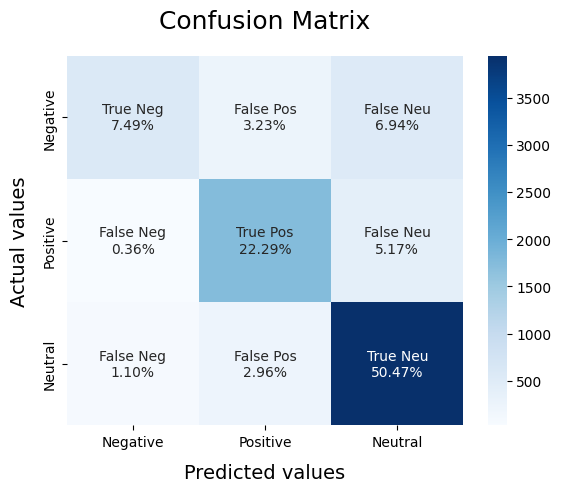

In [ ]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred = LRmodel.predict(X_test)

<Axes: >

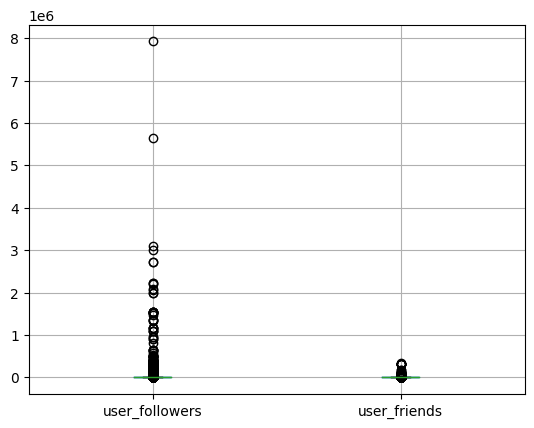

In [ ]:
new_data = df[['user_followers','user_friends',]]
new_data.boxplot()

In [ ]:
from sklearn.svm import LinearSVC

              precision    recall  f1-score   support

    Negative       0.81      0.61      0.69      1379
     Neutral       0.83      0.85      0.84      2173
    Positive       0.86      0.92      0.89      4259

    accuracy                           0.84      7811
   macro avg       0.83      0.79      0.81      7811
weighted avg       0.84      0.84      0.84      7811



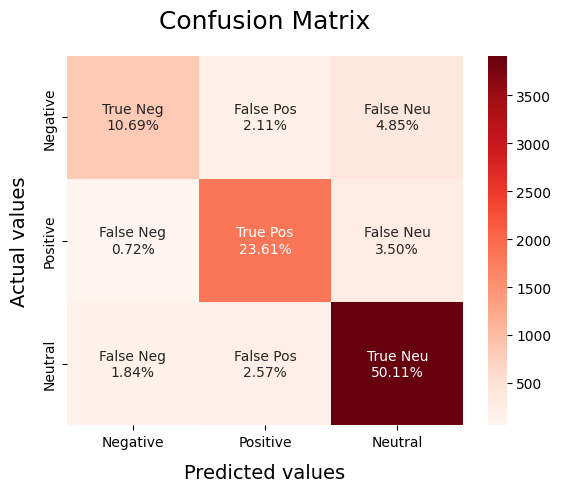

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred1 = SVCmodel.predict(X_test)